# Machine Learning HW 2

## Importing and cleaning data/visualization/initial regression

Importing the data and some other stuff. 

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV


%matplotlib inline
test=pd.read_csv("C:\\Users\Mason\Desktop\Test.csv")
data_train=pd.read_csv("C:\\Users\Mason\Documents\School\Winter 2019\Econ 213R\house-prices-advanced-regression-techniques\Train.csv")

This is an absolute blind regression where all I did was account for missing data. I used an interpolate function to fill missing data. I'm not really sure if filling with the mean or using this interpolate function, but I got a little bit better results using interpolate when I was running through things initially so I use the interpolate throughout. It appears to be overfitting becasue the RMSE I get here is much lower than when I submit it to Kaggle. It is a good benchmark for improvment though. I got a .1514 on Kaggle with this. I print out extra stuff just so I can see that it is working. 

In [2]:
dat= data_train.select_dtypes(include=[np.number]).interpolate().dropna()
tes=test.select_dtypes(include=[np.number]).interpolate().dropna()
te=tes.drop(['Id'], axis=1)
Y=np.log(data_train.SalePrice)
X=dat.drop(['SalePrice', 'Id'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=42, test_size=.33)

lr=linear_model.LinearRegression()
model=lr.fit(X_train, Y_train)
predictions=model.predict(X_test)
print('RMSE is: \n', mean_squared_error(Y_test, predictions))


submission=pd.DataFrame()
submission['Id']=tes.Id

predictions=model.predict(te)
final_predictions=np.exp(predictions)
print("Original predictions are: \n", predictions[:10])
print("Final predictions are: \n", final_predictions[:10])
submission['SalePrice']=final_predictions

print(submission.head())
submission.to_csv('submission5.csv', index=False)

RMSE is: 
 0.0233909053042
Original predictions are: 
 [ 11.68819837  11.70231921  12.03301618  12.18402226  12.11126386
  12.08177688  12.19285315  12.05916917  12.19677171  11.68316508]
Final predictions are: 
 [ 119157.13594261  120851.67044539  168218.02344465  195638.18856968
  181909.36779837  176623.7217266   197373.49941004  172675.46155989
  198148.43739513  118558.88982168]
     Id      SalePrice
0  1461  119157.135943
1  1462  120851.670445
2  1463  168218.023445
3  1464  195638.188570
4  1465  181909.367798


These are the coefficents from the above model. I also graphed the confidence intervals as well in a plot below. There were a lot of them and I couldn't get the graph to be bigger so you have to zoom in a bit to read much about them. As such this plot is not very helpful so I do not spend much time looking at coefficents or their confidence intervals going forward. 

In [3]:
sorted(list(zip(X, lr.coef_)), key=lambda coeff: abs(coeff[1]), reverse=True)

[('OverallQual', 0.088679966445050815),
 ('GarageCars', 0.08077005546026883),
 ('BsmtFullBath', 0.071681225079325603),
 ('Fireplaces', 0.052176045405543089),
 ('KitchenAbvGr', -0.045119107470098993),
 ('OverallCond', 0.040038537772823013),
 ('FullBath', 0.036769867621468583),
 ('HalfBath', 0.031222881767532556),
 ('BsmtHalfBath', 0.015779927764049306),
 ('TotRmsAbvGrd', 0.015574919687870694),
 ('YrSold', -0.0033406338662997919),
 ('YearBuilt', 0.0028765815200369675),
 ('MoSold', 0.0018242754481963609),
 ('YearRemodAdd', 0.0014406101609692286),
 ('BedroomAbvGr', 0.0013635010972160571),
 ('MSSubClass', -0.00088956737364314698),
 ('LotFrontage', -0.00065545796233722621),
 ('PoolArea', -0.00064908991491773515),
 ('GarageYrBlt', -0.00043950599548333127),
 ('ScreenPorch', 0.00041207911053002012),
 ('3SsnPorch', 0.0003009939561822659),
 ('EnclosedPorch', 0.00018827494647917845),
 ('GrLivArea', 0.00015951411561389295),
 ('LowQualFinSF', 0.00014565501689192857),
 ('WoodDeckSF', 0.00011962678409

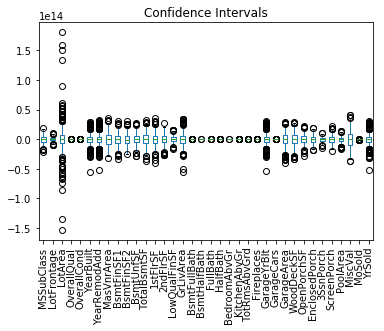

In [4]:
from sklearn.utils import resample
n_bootstraps = 1000
bootstrap_X = []
bootstrap_y = []
for _ in range(n_bootstraps):
    sample_X, sample_y = resample(X, Y)
    bootstrap_X.append(sample_X)
    bootstrap_y.append(sample_y)
    
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
coeffs = []
for i, data in enumerate(bootstrap_X):
    linear_regression_model.fit(X, bootstrap_y[i])
    coeffs.append(linear_regression_model.coef_)
    

coef_df = pd.DataFrame(coeffs, columns=X.columns)
coef_df.plot(kind='box')
plt.xticks(rotation=90)
plt.title("Confidence Intervals")
plt.figure(figsize=(20,12))

Here I'm making sure everything is imported right and getting an initial look at the data we have to work with. 

In [5]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


It says in some information about the dataset that there are some outliers that negatively impact the accuracy of estimation because there are some houses that are very large and cheap. Here I plotted these outliers and dropped them from the dataset. I plotted a bunch of relationships, but I've only kept those that I thought were interesting or that I then used to change the data in some way from. 

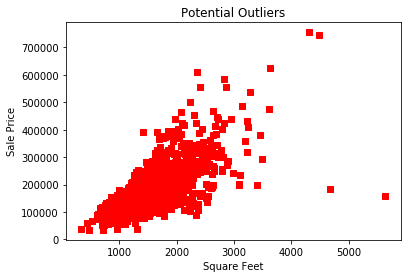

3627

In [6]:
plt.scatter(data_train.GrLivArea, data_train.SalePrice, c="Red", marker="s")
plt.title("Potential Outliers")
plt.xlabel("Square Feet")
plt.ylabel("Sale Price")
plt.show()

train=data_train[data_train.GrLivArea<4000]
train.GrLivArea.max()

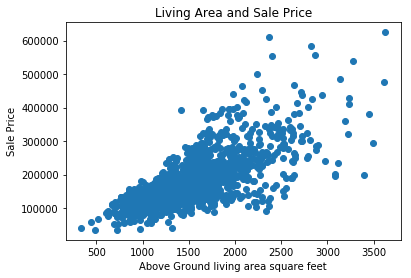

In [7]:
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Above Ground living area square feet')
plt.title("Living Area and Sale Price")
plt.show()

I thought this was really cool. It is a seaborn plot that shows the relationship between SalePrice and 6 of the numerical data categories I thought would have a big impact on sales price. I'm still just trying to get a feel for the data, how it is distributed and getting ideas for how to approach the problem. 

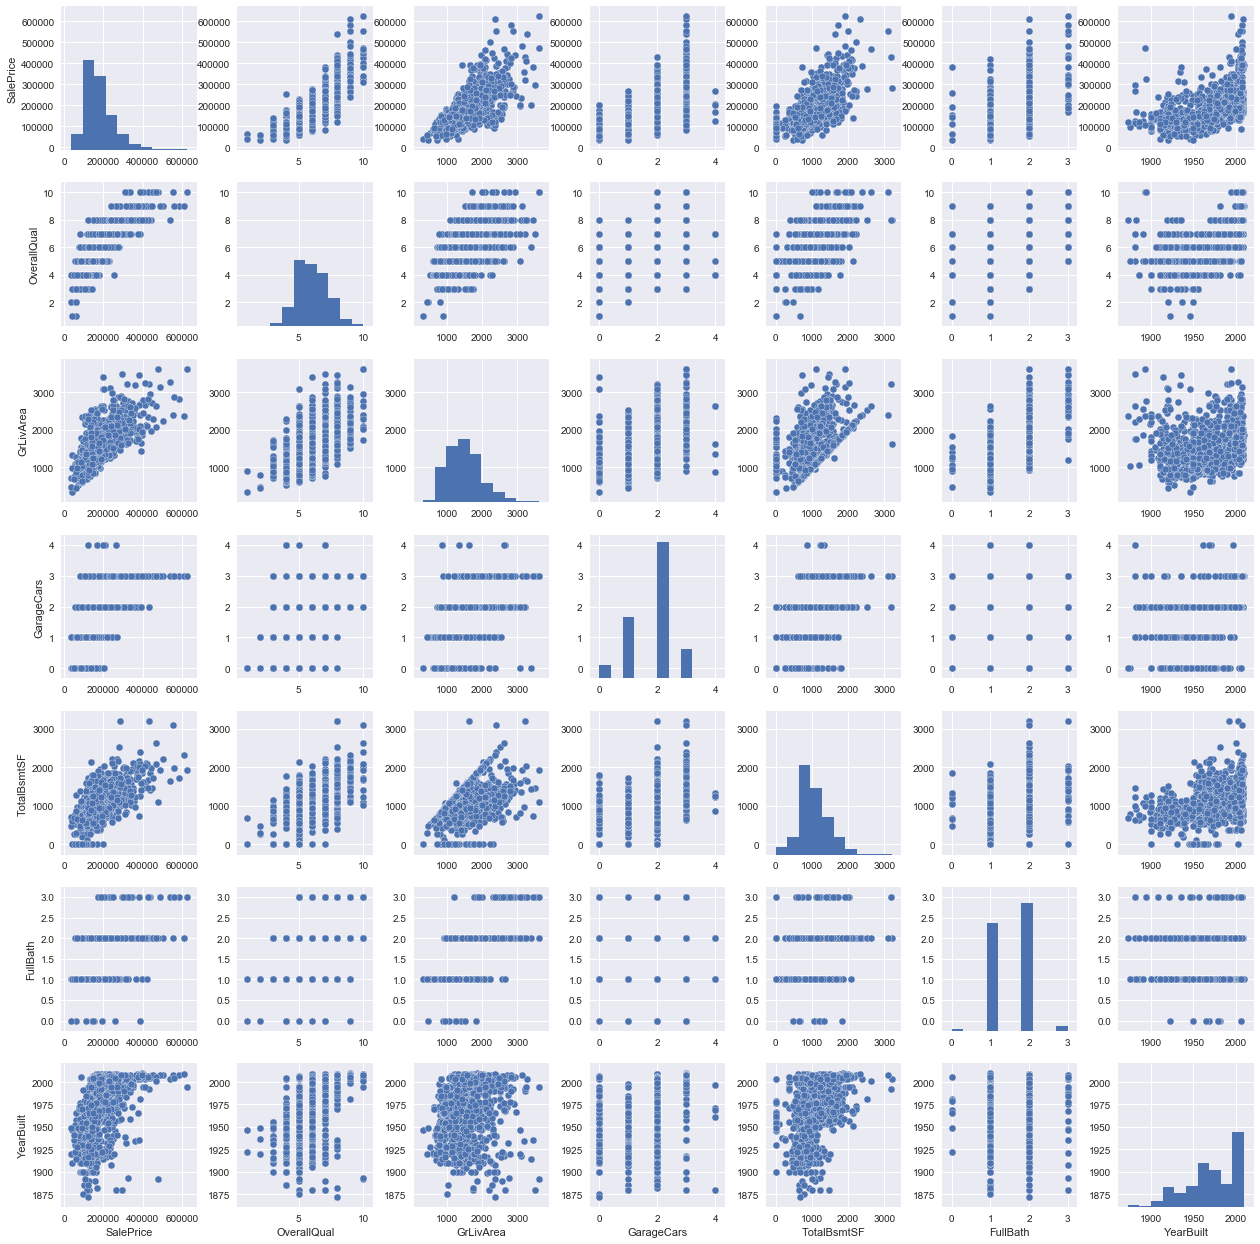

In [8]:
sns.set()
cols= ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size=2.5)
plt.show()

It appears that there are a few outliers when it comes to gargae area. There are a couple houses that are very cheap, but have huge garage area so I decided to drop these and only keep garage area that is less than 1200 sq feet. 

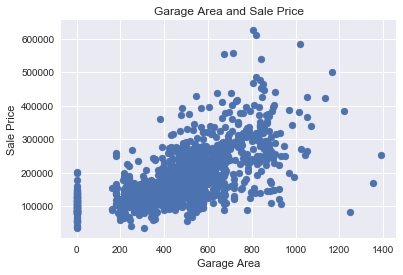

1166

In [9]:
plt.scatter(x=train['GarageArea'], y=train["SalePrice"])
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.title("Garage Area and Sale Price")
plt.show()

train=data_train[data_train.GarageArea<1200]
train.GarageArea.max()

I got the idea to collapse this category from 6 options to 2 from a kernal on kaggle. As you can see from my plot the partial sale condition deviates from the other 5 in a significant way so I coded the first five groups to be in one group and allowed partial to be different in order to both simplify the options and catch this trend in the data. I plotted it again after to make sure that I did what I wanted to do and to make sure that there is a significant difference in sale price between the two groups. 

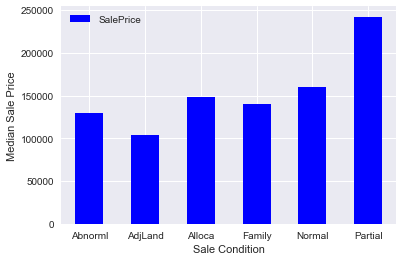

In [10]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [11]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

C:\Users\Mason\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


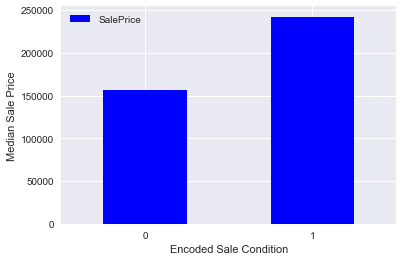

In [12]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

After this brief data cleaning I ran the same test again and submitted it and got a .13817 which is an improvement 

In [13]:
dat2= train.select_dtypes(include=[np.number]).interpolate().dropna()
tes2=test.select_dtypes(include=[np.number]).interpolate().dropna()
te2=tes2.drop(['Id'], axis=1)
Y=np.log(train.SalePrice)
X=dat2.drop(['SalePrice', 'Id'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=42, test_size=.33)

In [14]:
lr=linear_model.LinearRegression()
model=lr.fit(X_train, Y_train)
predictions=model.predict(X_test)
print('RMSE is: \n', mean_squared_error(Y_test, predictions))

RMSE is: 
 0.0178253278631


Here I am preparing my targeted column, sale price, and takeing the log of it because sale price is a huge number. 

In [15]:
target=train.SalePrice
lntarget=np.log(target)
targets=pd.DataFrame(lntarget)


I have had a lot of trouble in this assignment of keeping a handle on all of the changes I am making to dataframes and making sure that I am doing the same thing for test and train dataframes for different regressions so I have several dataframes being called for their shape or info throughout my code such as below which helps me to know which ones are which size. 

In [16]:
test.shape

(1459, 81)

Here I begin to look at the missing data and we can see that there is quite a lot. Luckily for the dataset it looks like the majority of the missing data is in sections that are probably not going to be major predictors of housing price. 

In [17]:
nulls=(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns=['Null Count']
nulls.index.name='Feature'
print(nulls)

Feature
PoolQC          1449
MiscFeature     1402
Alley           1364
Fence           1174
FireplaceQu      689
LotFrontage      258
GarageQual        81
GarageCond        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
RoofStyle          0
RoofMatl           0
ExterQual          0
Exterior1st        0
Exterior2nd        0
YearBuilt          0
dtype: int64


## Dummy Variables and Feature Addition

Here I'm separating all of the categorical data from the numerical data so that later on we can work with dummies a bit. 

In [18]:
numbers=train.select_dtypes(include=[np.number])
categorical=train.select_dtypes(exclude=[np.number])
num=test.select_dtypes(include=[np.number])
cat=test.select_dtypes(exclude=[np.number])

Here I am using the interpolate function to fill in missing data with an average from the data. Most of the data doesn't appear to matter much to predicting sale price so I'm okay with using this method to deal with the missing info. 

In [19]:
t=test.select_dtypes(include=[np.number]).interpolate().dropna()
d=train.select_dtypes(include=[np.number]).interpolate().dropna()

Here I am rescaling my data to prepare it for my regressions later on. 

In [20]:
dd=d.drop(['Id', 'SalePrice'], axis=1)
scale=StandardScaler()
scale.fit(dd)
scale_df=scale.transform(dd)


In [21]:
tt=t.drop(['Id'], axis=1)
t_scale=StandardScaler()
t_scale.fit(tt)
t_scale_df=t_scale.transform(tt)


Here I am preparing my train_test split so that I can test my model on some of the training data that the model has not yet seen to look for overfitting. Here we see that the train and test RMSE are not that different so there is probably not much overfitting. 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(scale_df, lntarget, test_size=0.33, random_state=42)

In [23]:
param_dist = {"eta0": [.001, .003, .01, .03, .1, .3, 1, 3], "tol": [.01, .001, .0001]}
n_iter_search= 8 
model=SGDRegressor()
random_search=RandomizedSearchCV(model, param_distributions=param_dist,
                                n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))

Best Parameters: {'tol': 0.01, 'eta0': 0.03}


In [24]:
linear_regression_model = SGDRegressor(tol=.001, eta0=.03)
linear_regression_model.fit(X_train, y_train)
train_predictions = linear_regression_model.predict(X_train)
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train RMSE: {}".format(np.sqrt(train_mse)))
print("Test RMSE: {}".format(np.sqrt(test_mse)))

Train RMSE: 0.13725709567667527
Test RMSE: 0.13996340269605614


This submission got a score of .13975 which is a little bit worse than last time. Here I am using the scaler for the first time to scale my data before running the regression as well. We will continue. 

In [25]:
submission=pd.DataFrame()
submission['Id']=test.Id

predictions=linear_regression_model.predict(t_scale_df)
final_predictions=np.exp(predictions)
print("Original predictions are: \n", predictions[:10])
print("Final predictions are: \n", final_predictions[:10])
submission['SalePrice']=final_predictions

print(submission.head())
submission.to_csv('submission7.csv', index=False) 

Original predictions are: 
 [ 11.74451964  11.84669852  12.12231114  12.22899037  12.11856257
  12.09506547  12.20669473  12.05726678  12.22176409  11.72866374]
Final predictions are: 
 [ 126060.80390257  139622.62361018  183930.11149429  204636.47022129
  183241.9274284   178986.46518018  200124.4547114   172347.27849364
  203163.04134498  124077.75956704]
     Id      SalePrice
0  1461  126060.803903
1  1462  139622.623610
2  1463  183930.111494
3  1464  204636.470221
4  1465  183241.927428


Here we are going to continue working on the data to try to get an even better model. Here I am making dummy variables for one of the categorical variables to see if it will help our model.

In [26]:
train['enc_street']=pd.get_dummies(train.Street, drop_first=True)
test['enc_street']=pd.get_dummies(test.Street, drop_first=True)
print(train.enc_street.value_counts())

1    1450
0       5
Name: enc_street, dtype: int64


C:\Users\Mason\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Here I am encoding dummy variables for all of the categorical variables in the model. As we will see later on, my model with many dummy variables does not perform very well which is why I am careful to keep it seperate from my models where I only add in the one dummy

In [27]:

train_wdummies=pd.get_dummies(categorical, drop_first=True)
test_wdummies=pd.get_dummies(cat, drop_first=True)


Here I am taking care of missing data again and scaling the data again as well. I tried several differnt ways of cleaning the data and so sometimes I would go back to a point where I hadn't done this on the data yet so I go through this proces once or twice more as well. 

In [28]:
test_both=pd.concat([test_wdummies, num], axis=1)
test_ready=test_both.select_dtypes(include=[np.number]).interpolate().dropna()

In [29]:
data_both=pd.concat([train_wdummies, numbers], axis=1)
data=data_both.select_dtypes(include=[np.number]).interpolate().dropna()

In [30]:
scaler=StandardScaler()
scaler.fit(data)
scaled_df=scaler.transform(data)

In [31]:
test_scaler=StandardScaler()
test_scaler.fit(test_ready)
test_scaled_df=test_scaler.transform(test_ready)

Here I run a regression on the new dataframe which includes dummy variables for all categorical data and we see it performs worse than before. There may be an error in my code, but I've looked through it several times and can't find anything. It may be that I'm leading the model off with some variable when I make it into a dummy and I just haven't figured out where that is. So we will proceed using only the first dummy variable that we created and none others.

In [32]:

linear_regression_model = SGDRegressor(tol=.0001, eta0=.001)
linear_regression_model.fit(scaled_df, lntarget)
predictions = linear_regression_model.predict(scaled_df)
mse = mean_squared_error(lntarget, predictions)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 0.08379264703194271


In [33]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, lntarget, test_size=0.33, random_state=42)

In [34]:
param_dist = {"eta0": [.001, .003, .01, .03, .1, .3, 1, 3], "tol": [.01, .001, .0001]}
n_iter_search= 8 
model=SGDRegressor()
random_search=RandomizedSearchCV(model, param_distributions=param_dist,
                                n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))

Best Parameters: {'tol': 0.001, 'eta0': 0.01}


In [35]:
linear_regression_model = SGDRegressor(tol=.001, eta0=.01)
linear_regression_model.fit(X_train, y_train)
train_predictions = linear_regression_model.predict(X_train)
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train RMSE: {}".format(np.sqrt(train_mse)))
print("Test RMSE: {}".format(np.sqrt(test_mse)))

Train RMSE: 0.28423130077757064
Test RMSE: 2.720741344644716


Here I am preparing my data to do regressions with just the one dummy variable. 

In [36]:
test_ready_lessdummie=test.select_dtypes(include=[np.number]).interpolate().dropna()
lessdummie=train.select_dtypes(include=[np.number]).interpolate().dropna()

In [37]:
data_lessdummie=lessdummie.drop(['Id', 'SalePrice'], axis=1)
scaler_lessdummie=StandardScaler()
scaler_lessdummie.fit(data_lessdummie)
scaled_df_lessdummie=scaler_lessdummie.transform(data_lessdummie)


In [38]:
testy=test_ready_lessdummie.drop(['Id'], axis=1)

test_scaler_lessdummie=StandardScaler()
test_scaler_lessdummie.fit(testy)
test_scaled_df_lessdummie=test_scaler_lessdummie.transform(testy)

As I mentioned above, it was not until I started to play around with my hyper-parameters in my regression that I saw that my model with all of the dummy variables actually preformed quite well. So here I am running my regression on the set of fewer dummy variables and as would be expected it outputs a slightly worse score than before. 

In [39]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.001)
linear_regression_model.fit(scaled_df_lessdummie, lntarget)
predictions = linear_regression_model.predict(scaled_df_lessdummie)
mse = mean_squared_error(lntarget, predictions)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 0.13483195701409115


In [40]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df_lessdummie, lntarget, test_size=0.33, random_state=42)

In [41]:
param_dist = {"eta0": [.001, .003, .01, .03, .1, .3, 1, 3], "tol": [.01, .001, .0001]}
n_iter_search= 8 
model=SGDRegressor
random_search=RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))

Best Parameters: {'tol': 0.0001, 'eta0': 0.003}


In [42]:
linear_regression_model = SGDRegressor(tol=.01, eta0=.01)
linear_regression_model.fit(X_train, y_train)
train_predictions = linear_regression_model.predict(X_train)
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train RMSE: {}".format(np.sqrt(train_mse)))
print("Test RMSE: {}".format(np.sqrt(test_mse)))

Train RMSE: 0.14357405241897264
Test RMSE: 0.14326969275069346


In [43]:
tester=test_ready.drop(['Id'], axis=1)

Here I am playing around with adding another dummy variable. I spent a lot of time trying to get the dummy variables to play nicely with my models which is why I have so much code working with them. Here we see two dummy variables work a bit better than one but not as well as a bunch of dummy variables. I

In [44]:
train_2dummies=pd.get_dummies(train.MSZoning, drop_first=True)
test_2dummies=pd.get_dummies(test.MSZoning, drop_first=True)

In [45]:
test_ready_2dummie=train_2dummies.select_dtypes(include=[np.number]).interpolate().dropna()
data_2dummie=train_2dummies.select_dtypes(include=[np.number]).interpolate().dropna()

In [46]:
scaler_2dummie=StandardScaler()
scaler_2dummie.fit(data_2dummie)
scaled_df_w2dummie=scaler_2dummie.transform(data_2dummie)

In [47]:
test_scaler_2dummie=StandardScaler()
test_scaler_2dummie.fit(test_ready_2dummie)
test_scaled_df_2dummie=test_scaler_2dummie.transform(test_ready_2dummie)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df_w2dummie, lntarget, test_size=0.33, random_state=42)

In [49]:
param_dist = {"eta0": [.001, .003, .01, .03, .1, .3, 1, 3], "tol": [.01, .001, .0001]}
n_iter_search= 8 
model=SGDRegressor
random_search=RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))

Best Parameters: {'tol': 0.0001, 'eta0': 0.003}


In [50]:
ar_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(X_train, y_train)
train_predictions = linear_regression_model.predict(X_train)
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train RMSE: {}".format(np.sqrt(train_mse)))
print("Test RMSE: {}".format(np.sqrt(test_mse)))

Train RMSE: 0.3685447587304126
Test RMSE: 0.3728095002579204


I am seeing if there is any last data cleaning I can do before I move onto adding features to my data. I see that there are some outliers in lot area so I drop about 4 outliers as you can see in the plot below. 

In [51]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,enc_condition,enc_street
count,1455.000000,1455.000000,1197.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1447.000000,1455.000000,...,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000
mean,729.601375,56.872852,69.745196,10455.472165,6.096220,5.578694,1971.224742,1984.848110,102.615066,439.364261,...,22.029553,3.421306,15.112715,2.438488,43.253608,6.325773,2007.815120,180823.129210,0.083849,0.996564
std,421.782303,42.201060,23.193156,9880.273055,1.373389,1.112867,30.193365,20.631492,179.381349,434.191781,...,61.210563,29.367012,55.846195,38.249185,496.785398,2.702536,1.329816,79330.167781,0.277256,0.058540
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000
25%,364.500000,20.000000,59.000000,7537.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000,0.000000,1.000000
50%,729.000000,50.000000,69.000000,9464.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,0.000000,1.000000
75%,1094.500000,70.000000,80.000000,11568.500000,7.000000,6.000000,2000.000000,2004.000000,164.500000,710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,0.000000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,1.000000,1.000000


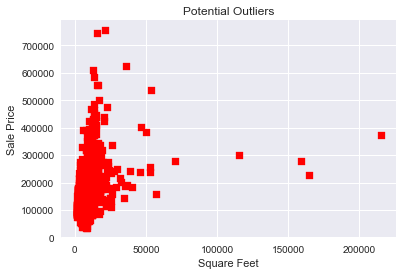

70761

In [52]:
plt.scatter(train.LotArea, data.SalePrice, c="Red", marker="s")
plt.title("Potential Outliers")
plt.xlabel("Square Feet")
plt.ylabel("Sale Price")
plt.show()

train=data_train[data_train.LotArea<100000]
train.LotArea.max()

In [53]:
target=train.SalePrice
lntarget=np.log(target)
targets=pd.DataFrame(lntarget)
train['enc_street']=pd.get_dummies(train.Street, drop_first=True)
test['enc_street']=pd.get_dummies(test.Street, drop_first=True)
print(train.enc_street.value_counts())

1    1451
0       5
Name: enc_street, dtype: int64


C:\Users\Mason\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


This model does about the same as my other ones. I played around with the hyperparameters a bit and keep trying different ones. So far all I have used is linear regression becasue I want to test to see if my data cleaning is helping to improve my score. This model performs very well on the train data, but does not perform quite as well on the test data which may mean that it is weighing variables more heavily that are important in the train data, but less so in the test data. I will move onto other models soon. 

In [54]:
test_ready_lessdummies=test.select_dtypes(include=[np.number]).interpolate().dropna()
test_ready_lessdummie=test_ready_lessdummies.drop(['Id'], axis=1)
data_lessdummie=train.select_dtypes(include=[np.number]).interpolate().dropna()
datazz=data_lessdummie.drop(['Id'], axis=1)
scaler_lessdummie=StandardScaler()
scaler_lessdummie.fit(datazz)
scaled_df_lessdummie=scaler_lessdummie.transform(datazz)
test_scaler_lessdummie=StandardScaler()
test_scaler_lessdummie.fit(test_ready_lessdummie)
test_scaled_df_lessdummie=test_scaler_lessdummie.transform(test_ready_lessdummie)
X_train, X_test, y_train, y_test = train_test_split(scaled_df_lessdummie, lntarget, test_size=0.33, random_state=42)


In [55]:
param_dist = {"eta0": [.001, .003, .01, .03, .1, .3, 1, 3], "tol": [.01, .001, .0001]}
n_iter_search= 8 
model=SGDRegressor
random_search=RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))


Best Parameters: {'tol': 0.0001, 'eta0': 0.01}


In [56]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.03)
linear_regression_model.fit(X_train, y_train)
train_predictions = linear_regression_model.predict(X_train)
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train RMSE: {}".format(np.sqrt(train_mse)))
print("Test RMSE: {}".format(np.sqrt(test_mse)))

Train RMSE: 0.10054993387853318
Test RMSE: 0.12000058659346406


Here I am looking at a list of how all the variables are correlated with SalePrice. This helps me to decide which variables to make into poly functions and which ones I may want to make interacting terms out of. 

In [57]:
corr=train.corr()
corr.sort_values(["SalePrice"], ascending=False, inplace=True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.792761
GrLivArea        0.708338
GarageCars       0.641490
GarageArea       0.624592
TotalBsmtSF      0.611049
1stFlrSF         0.603334
FullBath         0.559955
TotRmsAbvGrd     0.535008
YearBuilt        0.525587
YearRemodAdd     0.509796
GarageYrBlt      0.490518
MasVnrArea       0.478334
Fireplaces       0.462937
BsmtFinSF1       0.383087
LotArea          0.354494
LotFrontage      0.347763
WoodDeckSF       0.326204
2ndFlrSF         0.322351
OpenPorchSF      0.317946
HalfBath         0.288366
BsmtFullBath     0.222616
BsmtUnfSF        0.217719
BedroomAbvGr     0.168593
ScreenPorch      0.112924
PoolArea         0.093001
enc_street       0.051976
MoSold           0.046766
3SsnPorch        0.045204
Id              -0.018950
BsmtFinSF2      -0.019361
BsmtHalfBath    -0.019544
MiscVal         -0.022366
LowQualFinSF    -0.025217
YrSold          -0.029440
OverallCond     -0.078005
MSSubClass      -0.083704
EnclosedPorch   -0.127618
KitchenAbvGr

In [58]:
data_lessdummie["OverallGrade"] = data_lessdummie["OverallQual"] * data_lessdummie["OverallCond"]
data_lessdummie["TotalBath"] = data_lessdummie["BsmtFullBath"] + (0.5 * data_lessdummie["BsmtHalfBath"]) + \
data_lessdummie["FullBath"] + (0.5 * data_lessdummie["HalfBath"])
data_lessdummie["AllSF"] = data_lessdummie["GrLivArea"] + data_lessdummie["TotalBsmtSF"]
data_lessdummie["AllFlrsSF"] = data_lessdummie["1stFlrSF"] + data_lessdummie["2ndFlrSF"]
data_lessdummie["AllPorchSF"] = data_lessdummie["OpenPorchSF"] + data_lessdummie["EnclosedPorch"] + \
data_lessdummie["3SsnPorch"] + data_lessdummie["ScreenPorch"]

In [59]:
data_lessdummie["OverallQual-s2"] = data_lessdummie["OverallQual"] ** 2
data_lessdummie["OverallQual-s3"] = data_lessdummie["OverallQual"] ** 3
data_lessdummie["OverallQual-Sq"] = np.sqrt(data_lessdummie["OverallQual"])
data_lessdummie["AllSF-2"] = data_lessdummie["AllSF"] ** 2
data_lessdummie["AllSF-3"] = data_lessdummie["AllSF"] ** 3
data_lessdummie["AllSF-Sq"] = np.sqrt(data_lessdummie["AllSF"])
data_lessdummie["AllFlrsSF-2"] = data_lessdummie["AllFlrsSF"] ** 2
data_lessdummie["AllFlrsSF-3"] = data_lessdummie["AllFlrsSF"] ** 3
data_lessdummie["AllFlrsSF-Sq"] = np.sqrt(data_lessdummie["AllFlrsSF"])
data_lessdummie["GrLivArea-2"] = data_lessdummie["GrLivArea"] ** 2
data_lessdummie["GrLivArea-3"] = data_lessdummie["GrLivArea"] ** 3
data_lessdummie["GrLivArea-Sq"] = np.sqrt(data_lessdummie["GrLivArea"])
data_lessdummie["GarageCars-2"] = data_lessdummie["GarageCars"] ** 2
data_lessdummie["GarageCars-3"] = data_lessdummie["GarageCars"] ** 3
data_lessdummie["GarageCars-Sq"] = np.sqrt(data_lessdummie["GarageCars"])
data_lessdummie["TotalBath-2"] = data_lessdummie["TotalBath"] ** 2
data_lessdummie["TotalBath-3"] = data_lessdummie["TotalBath"] ** 3
data_lessdummie["TotalBath-Sq"] = np.sqrt(data_lessdummie["TotalBath"])

In [60]:
test_ready_lessdummie["OverallGrade"] = test_ready_lessdummie["OverallQual"] * test_ready_lessdummie["OverallCond"]
test_ready_lessdummie["TotalBath"] = test_ready_lessdummie["BsmtFullBath"] + (0.5 * test_ready_lessdummie["BsmtHalfBath"]) + \
test_ready_lessdummie["FullBath"] + (0.5 * test_ready_lessdummie["HalfBath"])
test_ready_lessdummie["AllSF"] = test_ready_lessdummie["GrLivArea"] + test_ready_lessdummie["TotalBsmtSF"]
test_ready_lessdummie["AllFlrsSF"] = test_ready_lessdummie["1stFlrSF"] + test_ready_lessdummie["2ndFlrSF"]
test_ready_lessdummie["AllPorchSF"] = test_ready_lessdummie["OpenPorchSF"] + test_ready_lessdummie["EnclosedPorch"] + \
test_ready_lessdummie["3SsnPorch"] + test_ready_lessdummie["ScreenPorch"]

In [61]:
test_ready_lessdummie["OverallQual-s2"] = test_ready_lessdummie["OverallQual"] ** 2
test_ready_lessdummie["OverallQual-s3"] = test_ready_lessdummie["OverallQual"] ** 3
test_ready_lessdummie["OverallQual-Sq"] = np.sqrt(test_ready_lessdummie["OverallQual"])
test_ready_lessdummie["AllSF-2"] = test_ready_lessdummie["AllSF"] ** 2
test_ready_lessdummie["AllSF-3"] = test_ready_lessdummie["AllSF"] ** 3
test_ready_lessdummie["AllSF-Sq"] = np.sqrt(test_ready_lessdummie["AllSF"])
test_ready_lessdummie["AllFlrsSF-2"] = test_ready_lessdummie["AllFlrsSF"] ** 2
test_ready_lessdummie["AllFlrsSF-3"] = test_ready_lessdummie["AllFlrsSF"] ** 3
test_ready_lessdummie["AllFlrsSF-Sq"] = np.sqrt(test_ready_lessdummie["AllFlrsSF"])
test_ready_lessdummie["GrLivArea-2"] = test_ready_lessdummie["GrLivArea"] ** 2
test_ready_lessdummie["GrLivArea-3"] = test_ready_lessdummie["GrLivArea"] ** 3
test_ready_lessdummie["GrLivArea-Sq"] = np.sqrt(test_ready_lessdummie["GrLivArea"])
test_ready_lessdummie["GarageCars-2"] = test_ready_lessdummie["GarageCars"] ** 2
test_ready_lessdummie["GarageCars-3"] = test_ready_lessdummie["GarageCars"] ** 3
test_ready_lessdummie["GarageCars-Sq"] = np.sqrt(test_ready_lessdummie["GarageCars"])
test_ready_lessdummie["TotalBath-2"] = test_ready_lessdummie["TotalBath"] ** 2
test_ready_lessdummie["TotalBath-3"] = test_ready_lessdummie["TotalBath"] ** 3
test_ready_lessdummie["TotalBath-Sq"] = np.sqrt(test_ready_lessdummie["TotalBath"])

In [62]:
dater=data_lessdummie.drop(['Id'], axis=1)
scaler_full=StandardScaler()
scaler_full.fit(dater)
scaled_df_full=scaler_full.transform(dater)

In [63]:
test_scaler_full=StandardScaler()
test_scaler_full.fit(test_ready_lessdummie)
test_scaled_df_full=test_scaler_full.transform(test_ready_lessdummie)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df_full, lntarget, test_size=0.33, random_state=42)

I added a lot of features to the model and so we see that my model is starting to overfit quite a bit here. And as we could expect the submission to kaggle was not as good as some other models were either. 

In [65]:
param_dist = {"eta0": [.001, .003, .01, .03, .1, .3, 1, 3], "tol": [.01, .001, .0001]}
n_iter_search= 8 
random_search=RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))

Best Parameters: {'tol': 0.0001, 'eta0': 0.01}


In [66]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.003)
tttt=linear_regression_model.fit(X_train, y_train)
train_predictions = linear_regression_model.predict(X_train)
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train RMSE: {}".format(np.sqrt(train_mse)))
print("Test RMSE: {}".format(np.sqrt(test_mse)))

Train RMSE: 0.09455588678862989
Test RMSE: 0.10547087291573723


In [67]:
submission=pd.DataFrame()
submission['Id']=test.Id

predictions=tttt.predict(test_scaled_df_full)
final_predictions=np.exp(predictions)
print("Original predictions are: \n", predictions[:10])
print("Final predictions are: \n", final_predictions[:10])
submission['SalePrice']=final_predictions


print(submission.head())
submission.to_csv('submission12.csv', index=False)

Original predictions are: 
 [ 11.70982344  11.92403625  12.08522677  12.11346679  12.05884224
  12.00707481  12.09988747  11.96396195  12.05859744  11.75396158]
Final predictions are: 
 [ 121761.98029111  150849.24614057  177234.10515357  182310.54305075
  172619.01804728  163910.33318388  179851.62326521  156993.85677244
  172576.76633519  127256.69897923]
     Id      SalePrice
0  1461  121761.980291
1  1462  150849.246141
2  1463  177234.105154
3  1464  182310.543051
4  1465  172619.018047


## Running Additional Models

Now I am starting to run some new types of models. Here I am using elastic net.

In [68]:
from sklearn.linear_model import ElasticNetCV



clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 10])
model=clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
train_mse=mean_squared_error(y_train, train_predictions)
test_mse=mean_squared_error(y_test, test_predictions)
print("Train RMSE: {}".format(np.sqrt(train_mse)))
print("Test RMSE: {}".format(np.sqrt(test_mse)))

Train RMSE: 0.09141071505891227
Test RMSE: 0.0998724386729042


This submission was not very good so the model above must be doing something tricky where it is very good at the train dataset but is not preforming well with the test set. 

In [69]:
submission=pd.DataFrame()
submission['Id']=test.Id

predictions=model.predict(test_scaled_df_full)
final_predictions=np.exp(predictions)
print("Original predictions are: \n", predictions[:10])
print("Final predictions are: \n", final_predictions[:10])
submission['SalePrice']=final_predictions

print(submission.head())
submission.to_csv('submission8.csv', index=False)

Original predictions are: 
 [ 11.75514354  11.89590619  12.00611575  12.06160689  12.04151533
  12.02558991  12.05056077  12.01383108  12.06148703  11.77856492]
Final predictions are: 
 [ 127407.20046842  146664.97530022  163753.20847811  173096.91048444
  169653.827336    166973.41940509  171195.38154727  165021.5047924
  173076.16346428  130426.4732372 ]
     Id      SalePrice
0  1461  127407.200468
1  1462  146664.975300
2  1463  163753.208478
3  1464  173096.910484
4  1465  169653.827336


In [70]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



<module 'matplotlib.pyplot' from 'C:\\Users\\Mason\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

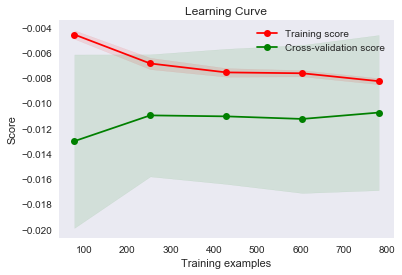

In [71]:
plot_learning_curve(model, "Learning Curve", X_train, y_train, cv=5)

In [72]:

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, accuracy_score, mean_squared_error

I am trying a K-nearest neighbors test here to see how well it works.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df_full, lntarget, test_size=0.20, random_state=42)
reg = KNeighborsRegressor()
gridsearch = GridSearchCV(reg, {"n_neighbors": [1, 3, 5, 7, 9, 11], "weights": ['uniform', 'distance'], 
                                'p': [1, 2, 3]}, scoring='neg_mean_squared_error')
grid=gridsearch.fit(X_train, y_train)
print("Best Params: {}".format(gridsearch.best_params_))
y_pred_train = gridsearch.predict(X_train)
y_pred_test = gridsearch.predict(X_test)
print("Train MSE: {}\tTest MSE: {}".format(mean_squared_error(y_train, y_pred_train),
                                           mean_squared_error(y_test, y_pred_test)))

Best Params: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Train MSE: 0.0	Test MSE: 0.020191086984972604


<module 'matplotlib.pyplot' from 'C:\\Users\\Mason\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

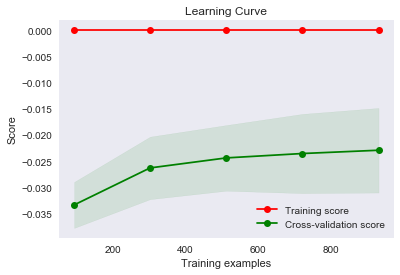

In [74]:
plot_learning_curve(grid, "Learning Curve", X_train, y_train, cv=5)

This model got a score of .1513 which is not much better than the first model I ran. I think it is clear that we have some weird stuff going on from the results above. I am feeding quite a few variables into this model and I know this model doesn't perform as well with lots of variables. It's also a very simple model so I'm not surprised that it did not do as well as some of my other models. 

In [75]:
submission=pd.DataFrame()
submission['Id']=test.Id

predictions=grid.predict(test_scaled_df_full)
final_predictions=np.exp(predictions)
print("Original predictions are: \n", predictions[:10])
print("Final predictions are: \n", final_predictions[:10])
submission['SalePrice']=final_predictions

print(submission.head())
submission.to_csv('submission9.csv', index=False)

Original predictions are: 
 [ 11.70307421  11.92395955  12.11176931  12.11114313  12.12860406
  12.09231089  12.14257057  12.05904046  12.03123243  11.75554806]
Final predictions are: 
 [ 120942.94809309  150837.67669154  182001.33642664  181887.4061073
  185091.21848858  178494.11135332  187694.43363431  172653.23897639
  167918.23320539  127458.75040244]
     Id      SalePrice
0  1461  120942.948093
1  1462  150837.676692
2  1463  182001.336427
3  1464  181887.406107
4  1465  185091.218489


In [76]:
for i in range(-5,3):
    alpha=10**i
    rm=linear_model.Ridge(alpha=alpha)
    ridge_model=rm.fit(X_train, y_train)
    preds_ridge=ridge_model.predict(X_test)
    print('MSE is: \n', mean_squared_error(y_test,preds_ridge))

MSE is: 
 0.00579224489946
MSE is: 
 0.00579203279592
MSE is: 
 0.00579022003615
MSE is: 
 0.00578632682063
MSE is: 
 0.00583511785638
MSE is: 
 0.00593802098836
MSE is: 
 0.00640751816775
MSE is: 
 0.00850046323141


In [77]:
rm=linear_model.Ridge(alpha=10**-2)
ridge_model=rm.fit(X_train, y_train)
preds_ridge=ridge_model.predict(X_test)
train_predictions=ridge_model.predict(X_train)
test_predictions=ridge_model.predict(X_test)
print("Train MSE is: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE is: {}".format(mean_squared_error(y_test, test_predictions)))
print(np.exp(train_predictions))

Train MSE is: 0.004597330687897145
Test MSE is: 0.005786326820627712
[ 228316.94847752  169533.74258494  253849.83399911 ...,  165034.82687868
  244670.48194176  128313.31094143]


This model actually worked quite well it gave me a score .136 which at this time is the best I have gotten. I ran the ridge regression on a number of alpha's and I took the best one and ran it on the model. I printed out MSE instead of RMSE which is why it looks super low. This actually makes sense to me that this model would work well. As I saw above, I have a lot of variables in this model so the ridge regression can help correct for possible multicollinearity in the model. 

In [78]:
submission=pd.DataFrame()
submission['Id']=test.Id

predictions=ridge_model.predict(test_scaled_df_full)
final_predictions=np.exp(predictions)
submission['SalePrice']=final_predictions

submission.to_csv('submission10.csv', index=False)

Here I am training my model on the entire dataset and then submit it to Kaggle. 

In [79]:
rm=linear_model.Ridge(alpha=10**-2)
ridge_models=rm.fit(scaled_df_full, lntarget)
preds_ridge=ridge_model.predict(scaled_df_full)
print(preds_ridge)

submission=pd.DataFrame()
submission['Id']=test.Id

predictions=ridge_models.predict(test_scaled_df_full)
final_predictions=np.exp(predictions)
submission['SalePrice']=final_predictions

submission.to_csv('submission20.csv', index=False)

[ 12.22005361  12.1428881   12.31330906 ...,  12.47785461  11.81831542
  11.91126165]


So in the end my best score I got was .13672 which is just about dead in the middle of the leaderboards. I got my score down by about .3 from the original model where I didn't do anything so there is some improvment to be seen in the model. 

## Final Comments

Model Selection: I most of the time I just ran a simple linear regression in order to judge if what I was doing to the data was making for better predictions or not. I also ran an elastic net model, K-nearest neighbors, and a ridge regression. I think that by the time I was running these models on my data I may have been using too many features and overfitting my model a bit which is why some of them did not perform as well as my earlier linear regression models. On most of my models I select my hyperparameters through a mixture of just guess and check looking for the best results and using a randomized search to help me. I found that the randomized search would help me to get good numbers, but when I would run through multiple times it would feed me different parameters so I would just keep the ones that gave me the best RMSE. On some of the later models I just had the models run through a list of parameters and then I choose the best ones. I also used a grid-search method on several of the later models as well. It was interesting to see how much difference your hyperparameters can make in the accuracy of your predictions. 

Model Interpretation: The scores I got I think are actually pretty good compared to the benchmark. I averaged between .13 and .15 for most of my models. It looks like the variables most important when it comes to predicting home price are things like the overall house quality as well as above ground square feet and the size of the garage. These variables make sense intuitively to me because these are the kinds of things that people often talk and care about when people are buying and selling houses. I think most of my models, especially near the end, suffer from high variance. I would get scores on my training data that is very good but then when I submit my test predictions I get worse scores from kaggle. Even when I just do my test-train split and look at my results I see that my train scores are usually a bit better than test. I could improve my models by taking out some of the features that I have added. I could also maybe try to combine some models and see if that helps with my scores at all, but I couldn't figure out how to stack my models. I'm pretty happy with the results I got though. I guess I don't really know how to quantify the score in my mind in terms of how much money I am usually off by in my estimates, but I feel like .136 RMSE is pretty accurate.

Model Usefulness: I think my final model is okay but not great. I think you can always improve your model and I think there are better techniques and data cleaning practices that could produce a better model. That being said, I think the model is pretty good for the skills we have learned so far in this class. It works better than about 2000 other models in this competition and I think that is a good sign. I removed a number of outliers from the data before feeding it into my models so I don't think this model would work very well with outliers, but I think it would work well with most normal houses. If you can tell that you might have a weird house that you are feeding into the model it may be helpful to use some of your knowledge about the housing market and about the specific house to alter certain attributes of the house to get out a score that is closer to what you are expecting. Or, if you know you will have a good number of weird houses to feed into the model over time you could train one model with more outliers built in so that it has been trained on some of the weirder data you might throw at it. This model would not be as good at predicting more normal houses but could give you a better prediction for stranger situations. I think it would be unwise to trust all of your predictions on one model. I think different models are doing good at predicting different aspects of the housing market. While we are looking for one model to give us the absolute best score we can get, in the real world we would not need to rely on only one model. We could have several models that are optimized to work in different situations and you could filter the incoming requests through different models to give the interested party the best prediction we can get. 